# import

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예비학습: `net.parameters()`의 의미 

9월27일 강의노트 중 "`net.parameters()`의 의미?"를 설명한다. 

`-` iterator, generator의 개념필요

- <https://guebin.github.io/IP2022/2022/06/06/(14주차)-6월6일.html>, 클래스공부 8단계 참고 


`-` 탐구시작: 네트워크 생성 

In [2]:
net = torch.nn.Linear(in_features=1,out_features=1)
net.weight

Parameter containing:
tensor([[0.9871]], requires_grad=True)

In [3]:
net.bias

Parameter containing:
tensor([-0.7848], requires_grad=True)

`-` torch.optim.SGD? 를 확인하면 params에 대한설명에 아래와 같이 되어있음 

```
params (iterable): iterable of parameters to optimize or dicts defining
        parameter groups
```

`-` 설명을 읽어보면 params에 iterable object를 넣으라고 되어있음 (iterable object는 숨겨진 명령어로 `__iter__`를 가지고 있는 오브젝트를 의미)

In [4]:
set(dir(net.parameters())) & {'__iter__'}

{'__iter__'}

`-` 무슨의미? 

In [5]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.9871]], requires_grad=True)
Parameter containing:
tensor([-0.7848], requires_grad=True)


`-` 그냥 이건 이런느낌인데? 

In [6]:
for param in [net.weight,net.bias]:
    print(param)

Parameter containing:
tensor([[0.9871]], requires_grad=True)
Parameter containing:
tensor([-0.7848], requires_grad=True)


결론: `net.parameters()`는 net오브젝트에서 학습할 파라메터를 모두 모아 리스트같은 iterable object로 만드는 함수라 이해할 수 있다. 

`-` 응용예제1

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv") 
x=torch.tensor(df.x).float().reshape(100,1)
y=torch.tensor(df.y).float().reshape(100,1)

`-` bias와 beta를 리스트로 묶어서 전달

In [8]:
b = torch.tensor(-5.0,requires_grad=True)
w = torch.tensor(10.0,requires_grad=True)
optimizr = torch.optim.SGD([b,w],lr=1/10) 

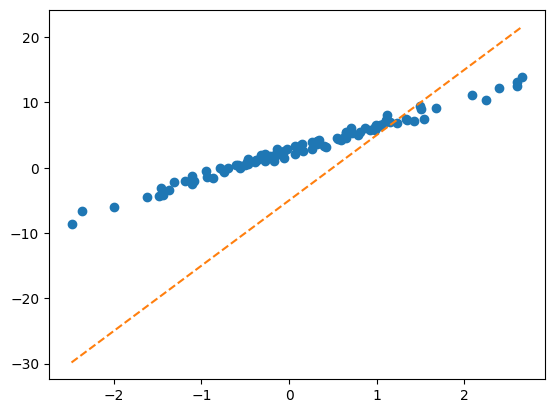

In [9]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

In [10]:
for epoc in range(30):
    ## step1
    yhat = b+ w*x 
    ## step2
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

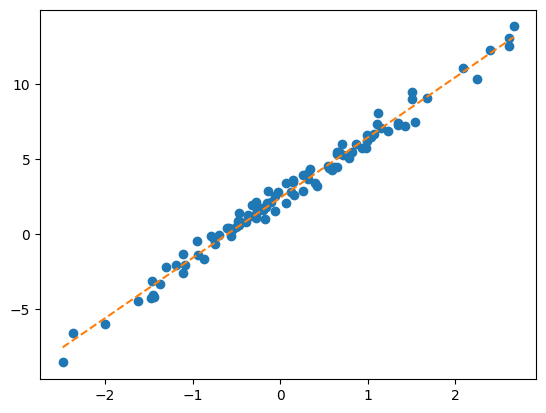

In [11]:
plt.plot(x,y,'o')
plt.plot(x,(w*x+b).data,'--')

`-` 응용예제2

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN//2022-09-22-regression.csv") 
x = torch.tensor(df.x).float().reshape(100,1)
y = torch.tensor(df.y).float().reshape(100,1)
X = torch.concat([torch.ones_like(x),x],axis=1)

In [13]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
optimizr = torch.optim.SGD([What],lr=1/10) # What은 iterable 하지 않지만 [What]은 iterable 함

`-` **iterable** 객체란? $\to$ 아래와 같이 `???` 자리에 올 수 있는 객체를 말한다. 

``` python
for i in ???
```

> string, tuple, list 등 과 같은 객체를 말한다. 또한, `__iter__` 이란 메소드를 가진다.

> 확인법  : set(dir(???)) & {'__iter__'} 해서 교집합결과를 {'__iter__'}로 반환하면 iterable 객체이다.

In [14]:
What

tensor([[-5.],
        [10.]], requires_grad=True)

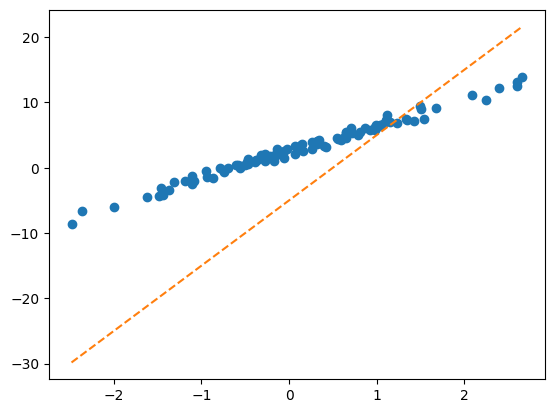

In [15]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

In [16]:
for epoc in range(30):
    ## step1
    yhat = X@What 
    ## step2 
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad() 

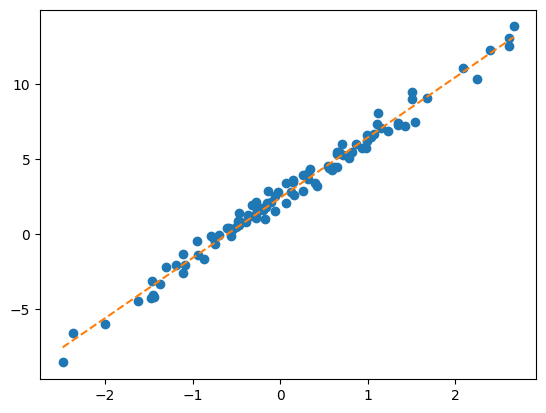

In [17]:
plt.plot(x,y,'o')
plt.plot(x,(X@What).data,'--')

## 스스로 학습 (중간고사 문제)

아래와 같은 자료가 있다고 가정하자. 

In [18]:
x = torch.rand([1000,1])*2-1
y = 3.14 + 6.28*x + torch.randn([1000,1]) 

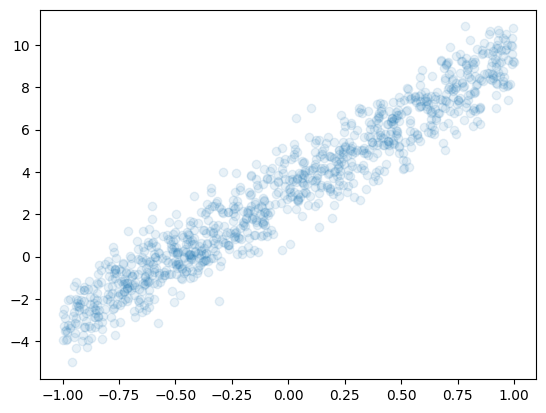

In [19]:
plt.plot(x,y,'o',alpha=0.1)

아래의 모형을 가정하고 $\alpha_0,\alpha_1,\beta_0,\beta_1$을 파이토치를 이용하여 추정하고자한다.

- $y_i = \alpha_0+\beta_0+ \beta_1x_i + \alpha_1x_i + \epsilon_i \quad \epsilon_i \sim N(0,\sigma^2)$ 


아래는 이를 수행하기 위한 코드이다. ???를 적절히 채워서 코드를 완성하라. 

In [20]:
alpha0 = torch.tensor([0.5], requires_grad=True)
alpha1 = torch.tensor([[0.5]], requires_grad=True)
beta0 = torch.tensor([0.7], requires_grad=True)
beta1 = torch.tensor([[0.7]], requires_grad=True)

In [21]:
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD([alpha0,alpha1,beta0,beta1], lr=1/10)

In [22]:
for epoc in range(30):
    ## 1
    yhat = alpha0 + beta0 + alpha1*x + beta1*x 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [23]:
print(alpha0+beta0)

tensor([3.1592], grad_fn=<AddBackward0>)


- 3.14 근처에 있음을 확인

In [24]:
print(alpha1+beta1)

tensor([[6.2157]], grad_fn=<AddBackward0>)


- 6.28 근처에 있음을 확인

# Define some funtions

In [25]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
soft = torch.nn.Softmax(dim=1)

# Exam2: abc

* a가 들어가면 b를 출력하고, b가 들어가면 c를 출력하는 형태

## data

In [26]:
txt = list('abc')*100
txt[:10]

['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c', 'a']

In [27]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [28]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'a', 'b'], ['b', 'c', 'a', 'b', 'c'])

## 하나의 은닉노드를 이용한 풀이 -- 억지로 성공

`-` 데이터정리 

In [29]:
mapping = {'a':0,'b':1,'c':2}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 0, 1]), tensor([1, 2, 0, 1, 2]))

`-` 학습

In [30]:
torch.manual_seed(202150256)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=3,embedding_dim=1),
    torch.nn.Tanh(),
    #===#
    torch.nn.Linear(in_features=1,out_features=3)
)
loss_fn = torch.nn.CrossEntropyLoss() ## loss함수안에 소프트맥스가 포함됨
optimizr = torch.optim.Adam(net.parameters())

In [31]:
for epoc in range(5000):
    ## 1
    ## 2 
    loss = loss_fn(net(x),y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과해석 

* net [:-1] (x) : 임베딩층과, Tanh를 지난 상태

In [32]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

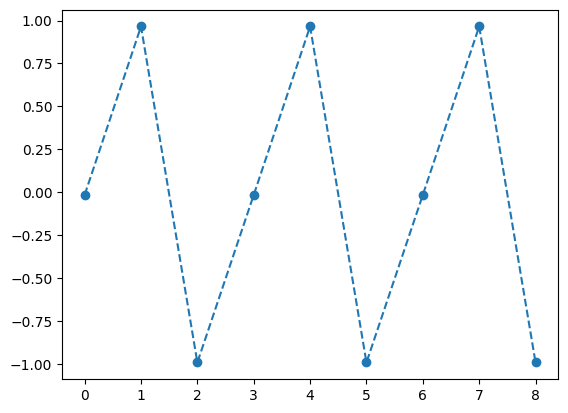

In [33]:
plt.plot(hidden[:9],'--o')

`-` 입력값이 a,b,c가 주어졌을 때 각각의 은닉층에서 출력된 값이다.

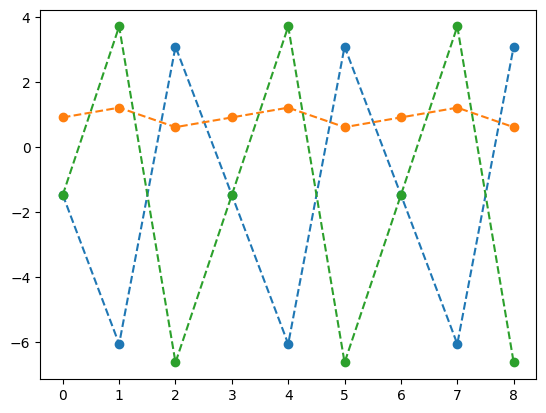

In [34]:
plt.plot(net(x).data[:9],'--o')

`-` 파란색은 net(x)에 첫번째 컬럼, 두번째 컬럼은 주황색, 세번째 컬럼은 녹색이다.

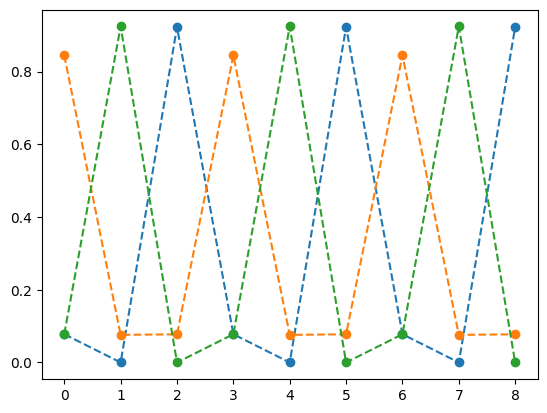

In [35]:
plt.plot(yhat[:9],'--o')

`-` 소프트맥스를 취했을 때...

* 억지로 맞추고있긴한데 파라메터가 부족해보인다.(주황색은 확실하게 1에 가깝지 않다.)

* net(x)에서 출력값을 봤을 때 확실하게 맞추는게 아닌 소거법으로 맞추고 있는 것과 같다.

`-` 결과시각화1

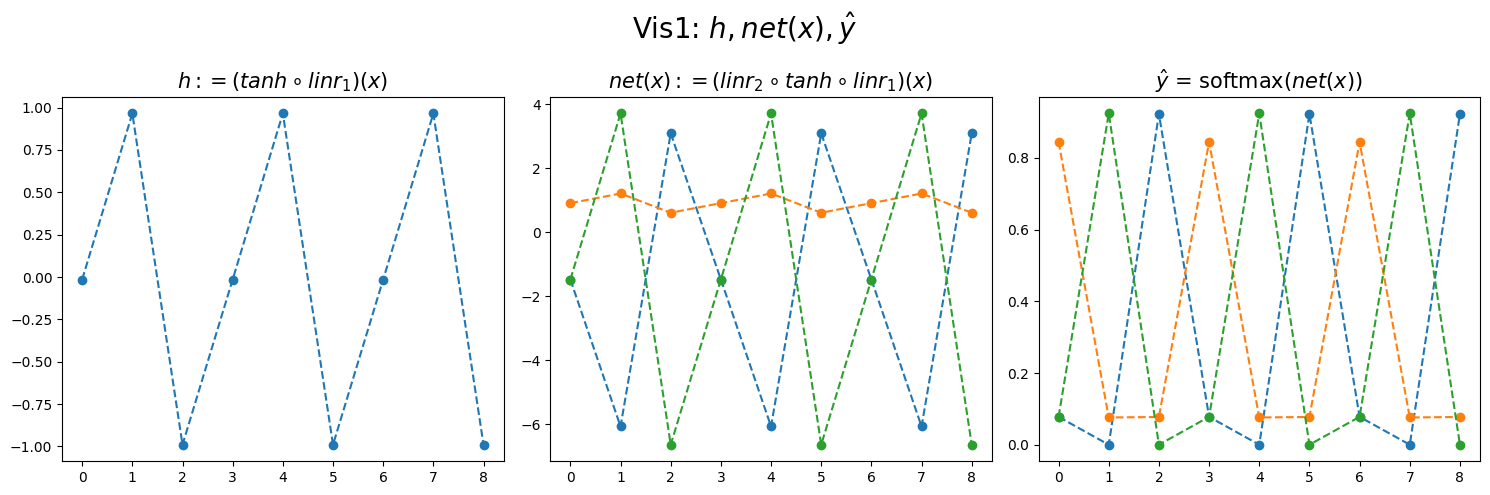

In [36]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

In [37]:
hidden[:9], (net[-1].weight.data).T, net[-1].bias.data

(tensor([[-0.0147],
         [ 0.9653],
         [-0.9896],
         [-0.0147],
         [ 0.9653],
         [-0.9896],
         [-0.0147],
         [ 0.9653],
         [-0.9896]]),
 tensor([[-4.6804,  0.3071,  5.2894]]),
 tensor([-1.5440,  0.9143, -1.3970]))

In [38]:
hidden[:9]@(net[-1].weight.data).T + net[-1].bias.data

tensor([[-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312],
        [-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312],
        [-1.4755,  0.9098, -1.4745],
        [-6.0618,  1.2108,  3.7086],
        [ 3.0875,  0.6104, -6.6312]])

- (파랑,주황,초록) 순서로 그려짐 
- 파랑 = hidden * (-4.6804) + (-1.5440) 
- 주황 = hidden * (0.3071) + (0.9143) 
- 초록 = hidden * (5.2894) + (-1.3970) 

`-` 내부동작을 잘 뜯어보니까 사실 엉성해. 엄청 위태위태하게 맞추고 있었음. 
- weight: 파랑과 초록을 구분하는 역할을 함 
- weight + bias: 뭔가 교모하게 애매한 주황값을 만들어서 애매하게 'b'라고 나올 확률을 학습시킨다. $\to$ 사실 학습하는 것 같지 않고 때려 맞추는 느낌, 쓸수있는 weight가 한정적이라서 생기는 현상 (양수,음수,0) 

--- 

**[참고](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html): torch.nn.Linear()의 비밀?**
- 사실 ${\boldsymbol y}={\boldsymbol x}{\bf W} + {\boldsymbol b}$ 꼴에서의 ${\bf W}$와 ${\boldsymbol b}$가 저장되는게 아니다. 
- ${\boldsymbol y}={\boldsymbol x}{\bf A}^T + {\boldsymbol b}$ 꼴에서의 ${\bf A}$와 ${\boldsymbol b}$가 저장된다. 
- ${\bf W} = {\bf A}^T$ 인 관계에 있으므로 l1.weight 가 우리가 생각하는 ${\bf W}$ 로 해석하려면 사실 transpose를 취해줘야 한다. 

**왜 이렇게..?**
- 계산의 효율성 때문 (numpy의 구조를 알아야함)
- ${\boldsymbol x}$, ${\boldsymbol y}$ 는 수학적으로는 col-vec 이지만 메모리에 저장할시에는 row-vec 로 해석하는 것이 자연스럽다. (사실 메모리는 격자모양으로 되어있지 않음) 

***잠깐 딴소리!!***

(예시1)

In [39]:
_arr = np.array(range(4)).reshape(2,2)

In [40]:
_arr.strides

(16, 8)

- 아래로 한칸 = 16 byte jump
- 오른쪽으로 한칸 = 8 byte jump

(예시2)

In [41]:
_arr = np.array(range(6)).reshape(3,2)

In [42]:
_arr.strides

(16, 8)

- 아래로 한칸 = 16byte jump (2칸)
- 오른쪽으로 한칸 = 8byte jump (1칸)

(예시3)

In [43]:
_arr = np.array(range(6)).reshape(2,3)

In [44]:
_arr.strides

(24, 8)

- 아래로 한칸 = 24칸 jump
- 오른쪽으로 한칸 = 8칸 jump

(예시4)

In [45]:
_arr = np.array(range(4),dtype=np.int8).reshape(2,2)

In [46]:
_arr

array([[0, 1],
       [2, 3]], dtype=int8)

In [47]:
_arr.strides

(2, 1)

- 아래로한칸 = 2칸 (= 2바이트 jump = 16비트 jump)
- 오른쪽으로 한칸 = 1칸 jump (= 1바이트 jump = 8비트 jump)

**진짜 참고..**

- 1바이트 = 8비트 
- 1바이트는 2^8=256 의 정보 표현
- np.int8은 8비트로 정수를 저장한다는 의미

In [48]:
2**8

256

In [49]:
print(np.array(55,dtype=np.int8))
print(np.array(127,dtype=np.int8))
print(np.array(300,dtype=np.int8)) # overflow 

55
127
44


***딴소리 끝!!***

--- 

`-` 결과시각화2

In [50]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([299, 7])

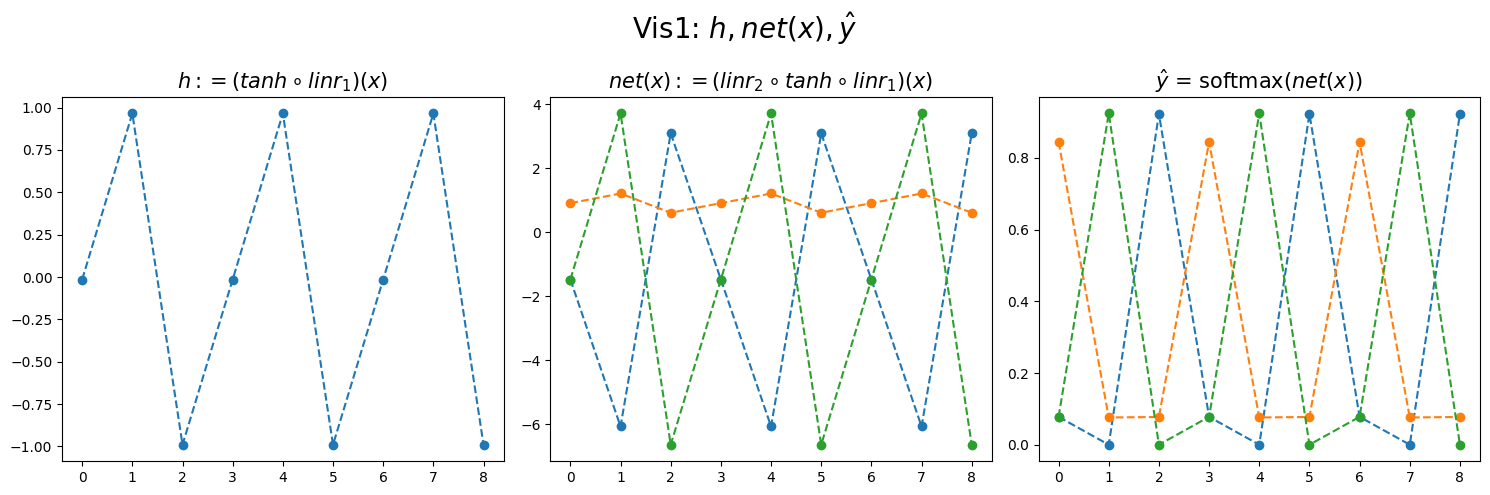

In [51]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

* 그래프 해석 중요!

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

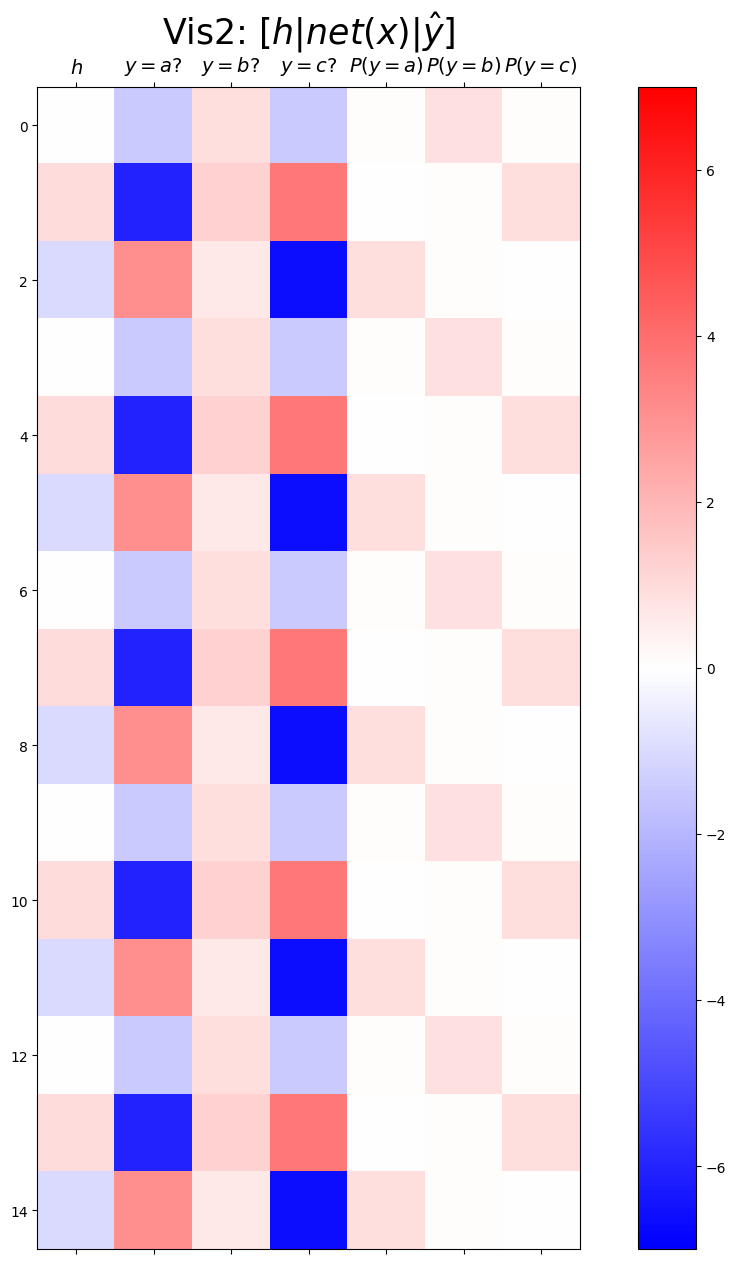

In [52]:
plt.matshow(combined[:15],vmin=-7,vmax=7,cmap='bwr')
plt.xticks(range(7), labels=[r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

# Exam3: abcd

## data

In [53]:
txt = list('abcd')*100
txt[:10]

['a', 'b', 'c', 'd', 'a', 'b', 'c', 'd', 'a', 'b']

In [54]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [55]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'a'], ['b', 'c', 'd', 'a', 'b'])

## 하나의 은닉노드를 이용한 풀이 -- 억지로 성공 

`-` 데이터정리 

In [56]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

`-` 학습

In [57]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [58]:
net[0].weight.data = torch.tensor([[-0.3333],[-2.5000],[5.0000],[0.3333]])

net[-1].weight.data = torch.tensor([[1.5000],[-6.0000],[-2.0000],[6.0000]])
net[-1].bias.data = torch.tensor([0.1500, -2.0000,  0.1500, -2.000])

In [59]:
for epoc in range(5000):
    ## 1
    ## 2 
    loss = loss_fn(net(x),y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [60]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

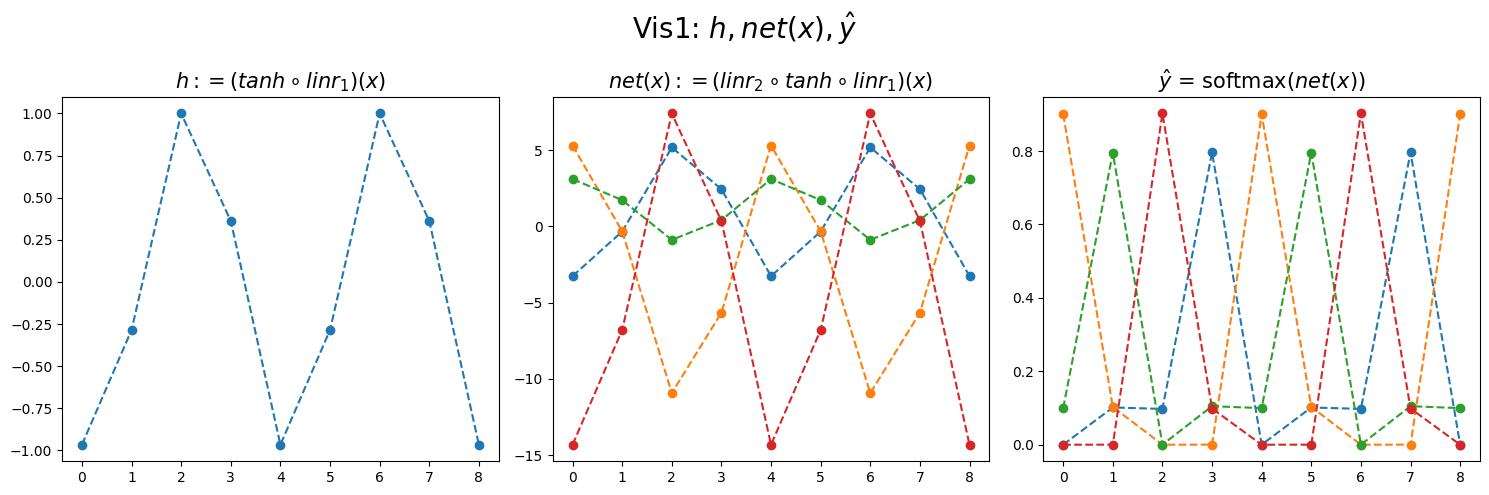

In [61]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [62]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([399, 9])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

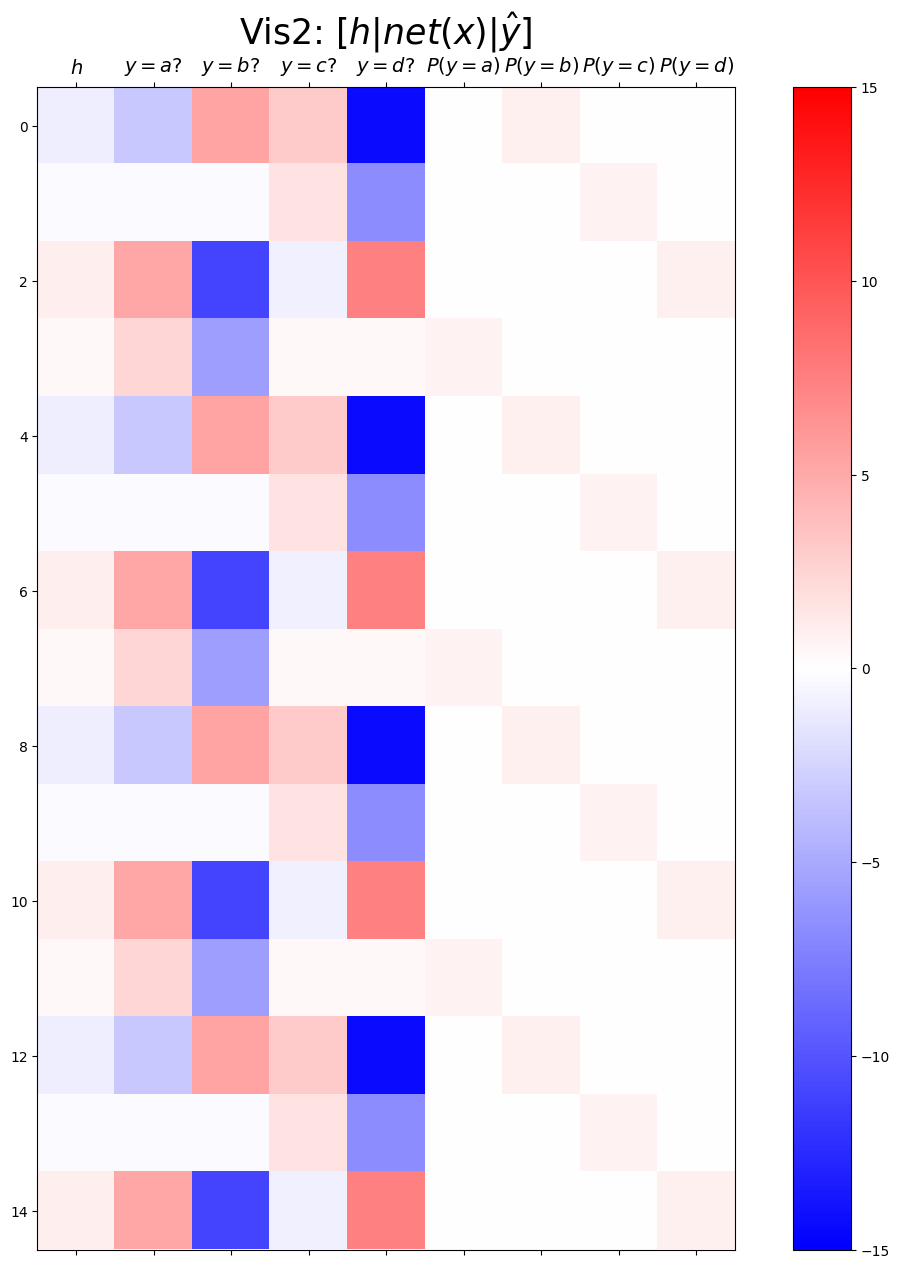

In [63]:
plt.matshow(combined[:15],vmin=-15,vmax=15,cmap='bwr')
plt.xticks(range(9), labels=[r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

## 두개의 은닉노드를 이용한 풀이 -- 깔끔한 성공

`-` 데이터정리 

In [64]:
mapping = {'a':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 0]), tensor([1, 2, 3, 0, 1]))

`-` 학습

In [65]:
torch.manual_seed(202150256)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [66]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [67]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

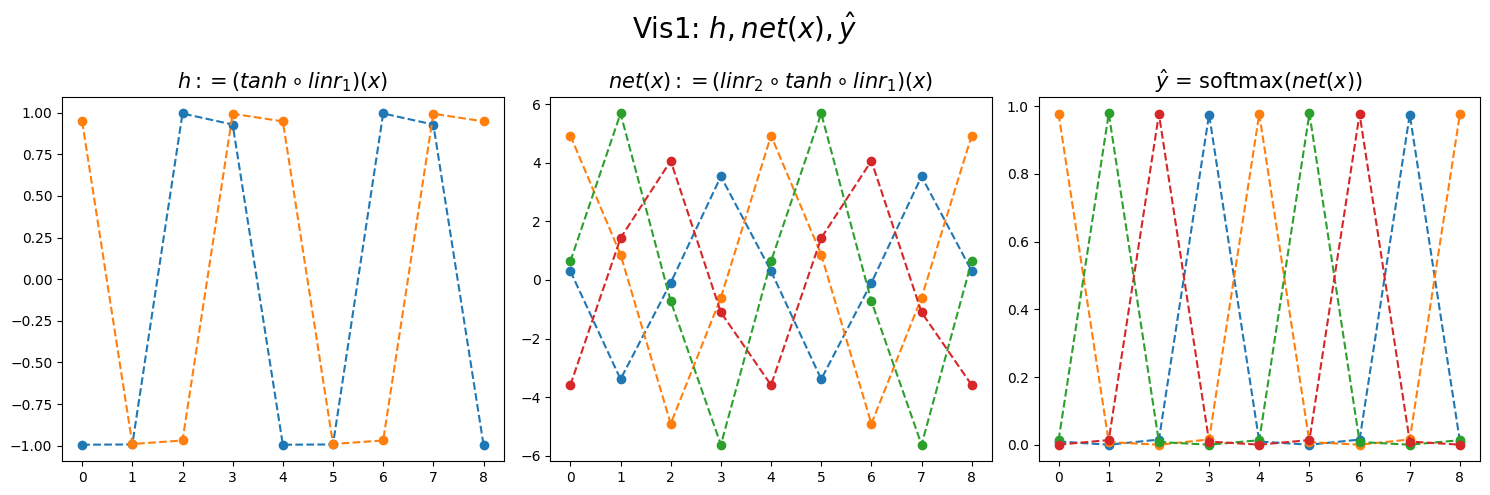

In [68]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [69]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([399, 10])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

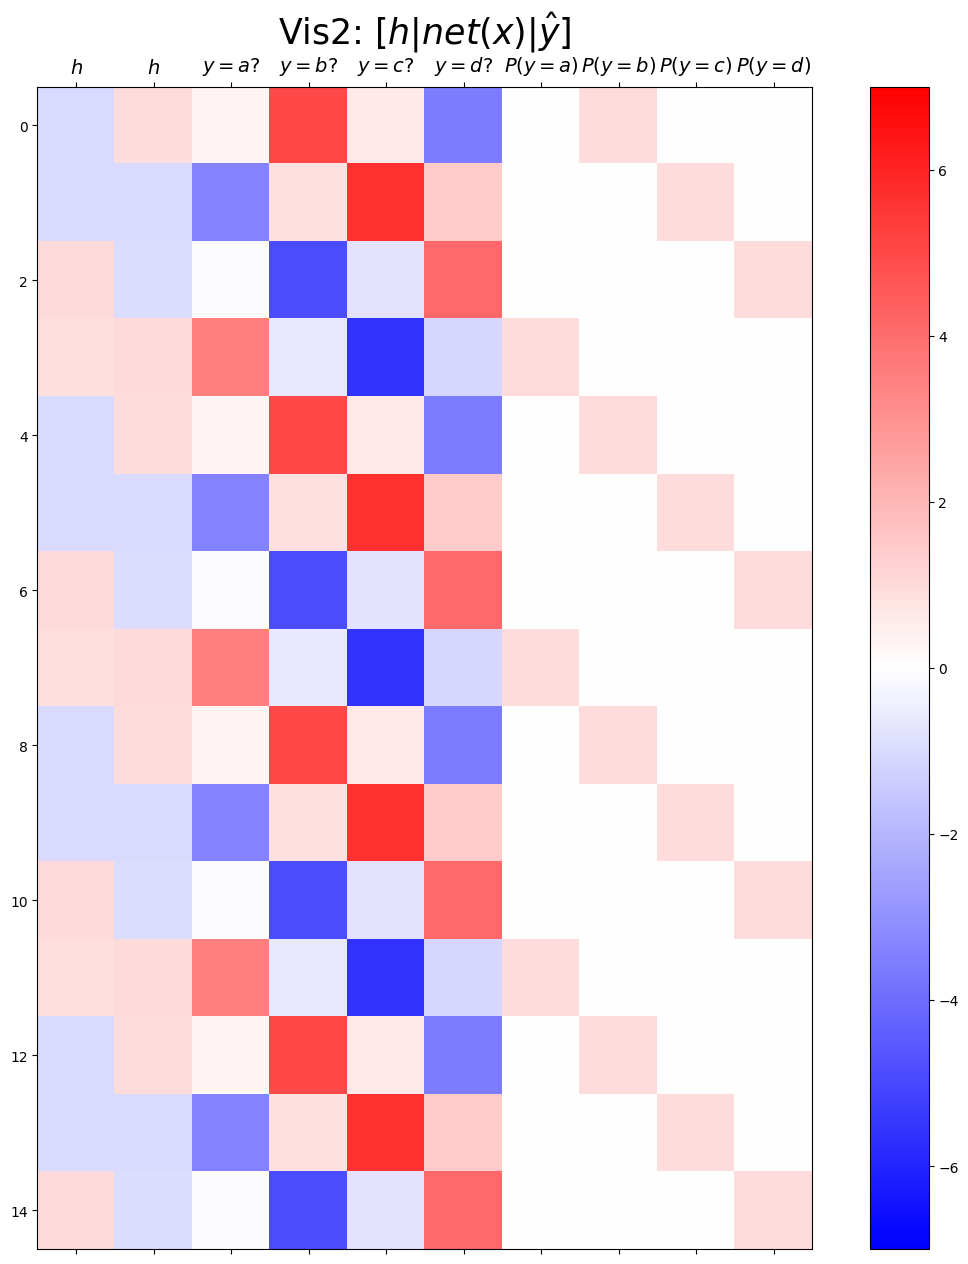

In [70]:
plt.matshow(combined[:15],vmin=-7,vmax=7,cmap='bwr')
plt.xticks(range(10), labels=[r'$h$',r'$h$',r'$y=a?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=a)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

# Exam4: abcde (스스로 공부)

## data

주어진 자료가 다음과 같다고 하자. 

In [71]:
txt = list('abcde')*100
txt[:10]

['a', 'b', 'c', 'd', 'e', 'a', 'b', 'c', 'd', 'e']

In [72]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [73]:
txt_x[:5],txt_y[:5]

(['a', 'b', 'c', 'd', 'e'], ['b', 'c', 'd', 'e', 'a'])

아래 코드를 변형하여 적절한 네트워크를 설계하고 위의 자료를 학습하라. (깔끔한 성공을 위한 최소한의 은닉노드를 설정할 것)

```Python
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=??,embedding_dim=??),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=??,out_features=??)
)
```

## 3개의 은닉노드를 이용한 풀이 

a,b,c,d,e 를 표현함에 있어서 3개의 은닉노드면 충분하다. 
- 1개의 은닉노드 -> 2개의 문자를 표현할 수 있음. 
- 2개의 은닉노드 -> 4개의 문자를 표현할 수 있음. 
- 3개의 은닉노드 -> 8개의 문자를 표현할 수 있음.

In [74]:
mapping = {'a':0,'b':1,'c':2,'d':3,'e':4}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 2, 3, 4]), tensor([1, 2, 3, 4, 0]))

In [75]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=5,embedding_dim=3),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=3,out_features=5)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [76]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [77]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

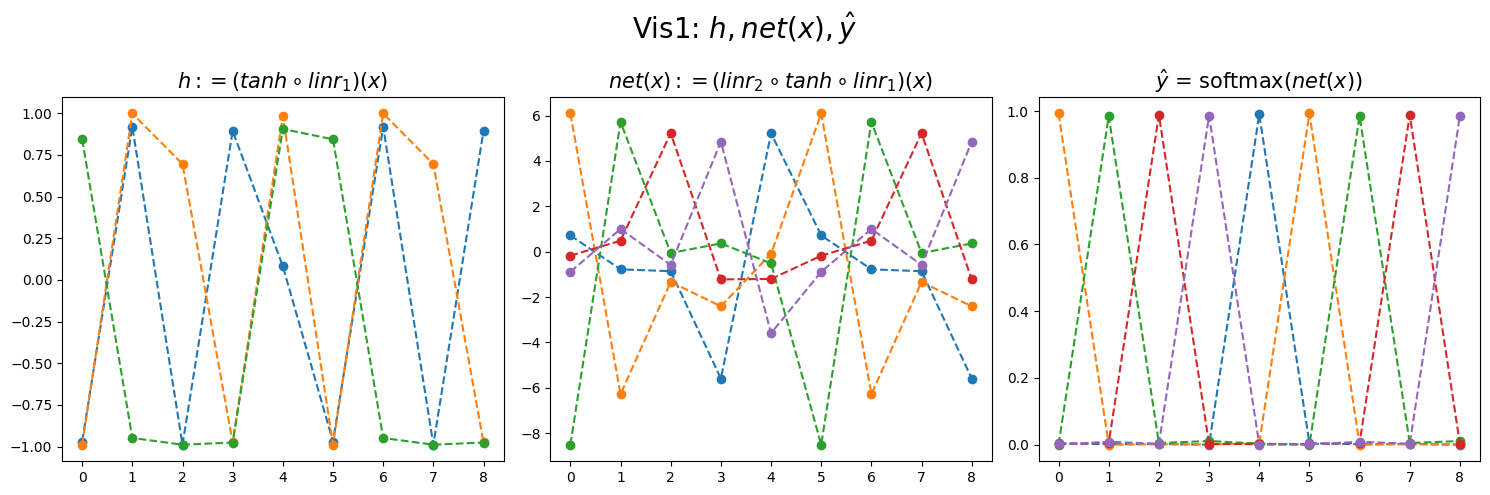

In [78]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [79]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([499, 13])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

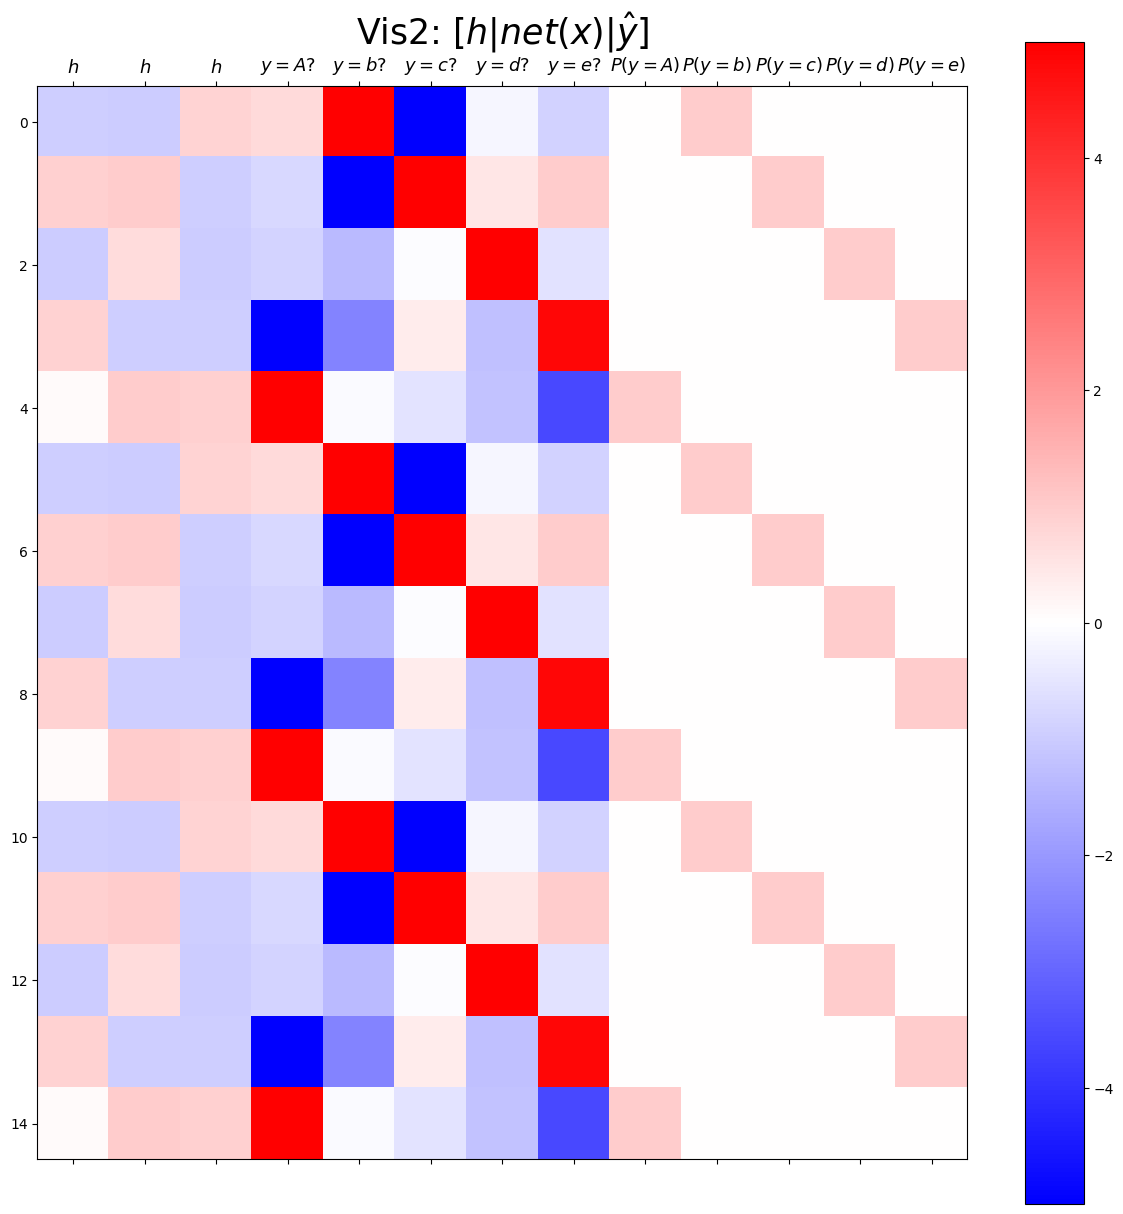

In [80]:
plt.matshow(combined[:15],vmin=-5,vmax=5,cmap='bwr')
plt.xticks(range(13), labels=[r'$h$',r'$h$',r'$h$',
                              r'$y=A?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$y=e?$',
                              r'$P(y=A)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$',r'$P(y=e)$'],size=13)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

# Exam5: AbAcAd

## data

In [81]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [82]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [83]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

## 두개의 은닉노드를 이용한 풀이 -- 실패

`-` 데이터정리 

In [84]:
mapping = {'A':0,'b':1,'c':2,'d':3}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

(tensor([0, 1, 0, 2, 0]), tensor([1, 0, 2, 0, 3]))

`-` 학습

In [85]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [86]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과시각화1

In [87]:
hidden = net[:-1](x).data
yhat = soft(net(x)).data

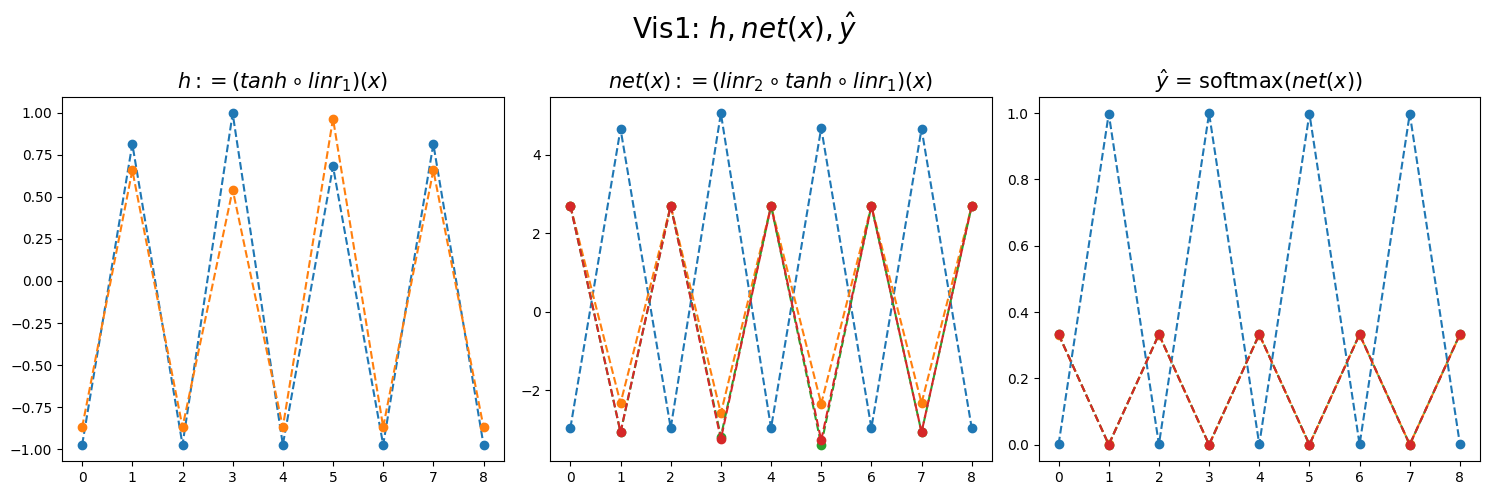

In [88]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(hidden[:9],'--o'); ax[0].set_title('$h:=(tanh \circ linr_1)(x)$',size=15)
ax[1].plot(net(x).data[:9],'--o'); ax[1].set_title('$net(x):=(linr_2 \circ tanh \circ linr_1)(x)$',size=15)
ax[2].plot(yhat[:9],'--o'); ax[2].set_title('$\hat{y}$ = softmax$(net(x))$',size=15);
fig.suptitle(r"Vis1: $h,net(x),\hat{y}$",size=20)
plt.tight_layout()

`-` 결과시각화2

In [89]:
combined  = torch.concat([hidden,net(x).data,yhat],axis=1)
combined.shape

torch.Size([599, 10])

Text(0.5, 1.0, 'Vis2: $[h | net(x) | \\hat{y}]$')

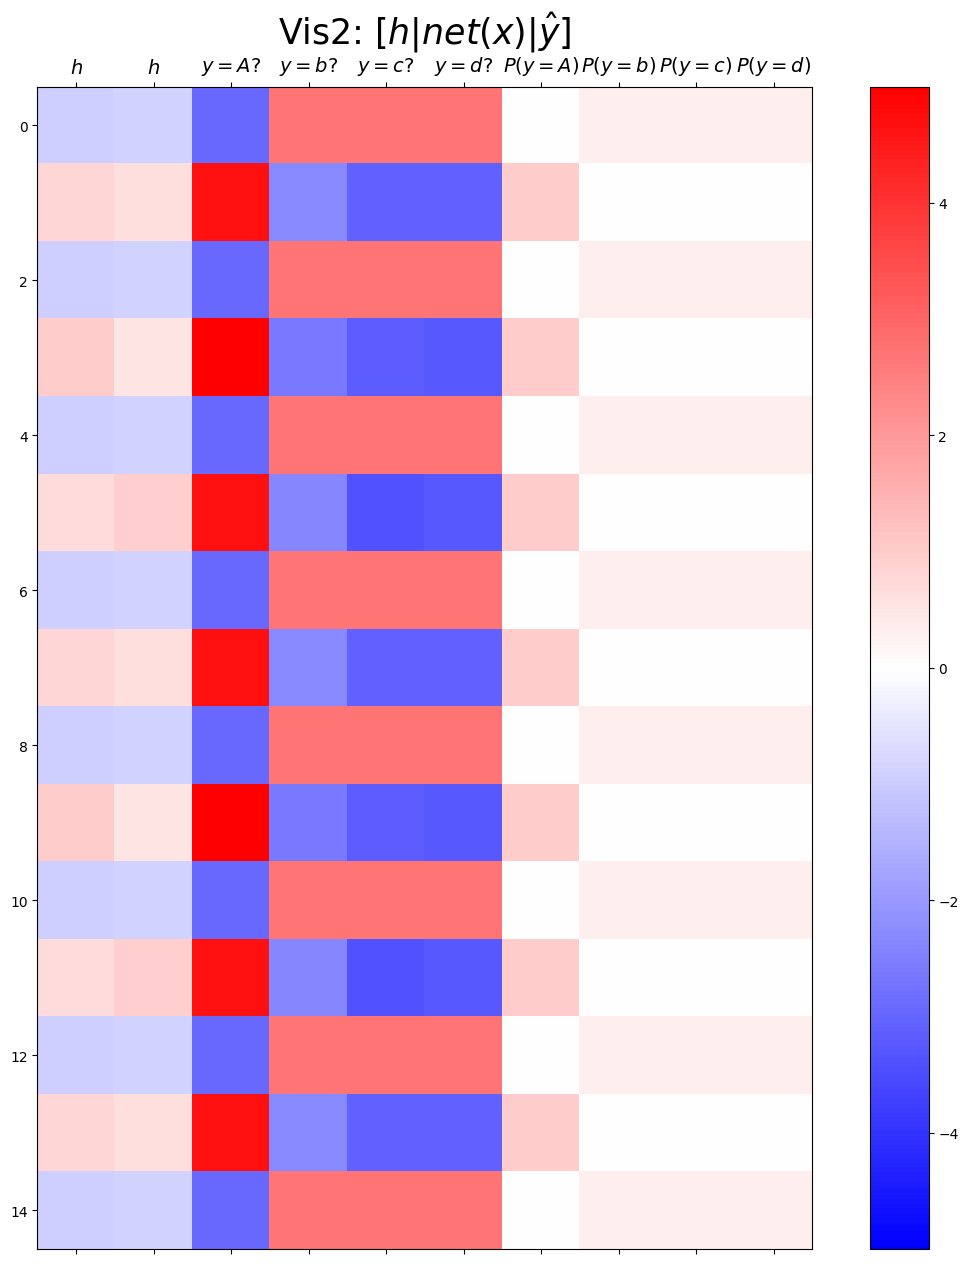

In [90]:
plt.matshow(combined[:15],vmin=-5,vmax=5,cmap='bwr')
plt.xticks(range(10), labels=[r'$h$',r'$h$',r'$y=A?$',r'$y=b?$',r'$y=c?$',r'$y=d?$',r'$P(y=A)$',r'$P(y=b)$',r'$P(y=c)$',r'$P(y=d)$'],size=14)
plt.colorbar()
plt.gcf().set_figwidth(15)
plt.gcf().set_figheight(15)
plt.title(r"Vis2: $[h | net(x) | \hat{y}]$",size=25)

- 실패


`-` 실패를 해결하는 순진한 접근방식: 위 문제를 해결하기 위해서는 아래와 같은 구조로 데이터를 다시 정리하면 될 것이다. 

|X|y|
|:-:|:-:|
|A,b|A|
|b,A|c|
|A,c|A|
|c,A|d|
|A,d|A|
|d,A|b|
|A,b|A|
|b,A|c|
|...|...|

`-` 순진한 접근방식의 비판: 
- 결국 정확하게 직전 2개의 문자를 보고 다음 문제를 예측하는 구조
- 만약에 직전 3개의 문자를 봐야하는 상황이 된다면 또 다시 코드를 수정해야함. 
- 그리고 실전에서는 직전 몇개의 문자를 봐야하는지 모름. 

***이것에 대한 해결책은 순환신경망이다.***

## 순환망을 위하여 data 다시정리

`-` 기존의 정리방식

In [91]:
txt = list('AbAcAd')*100
txt[:10]

['A', 'b', 'A', 'c', 'A', 'd', 'A', 'b', 'A', 'c']

In [92]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [93]:
txt_x[:5],txt_y[:5]

(['A', 'b', 'A', 'c', 'A'], ['b', 'A', 'c', 'A', 'd'])

In [94]:
x = torch.tensor(f(txt_x,{'A':0,'b':1,'c':2,'d':3}))
y = torch.tensor(f(txt_y,{'A':0,'b':1,'c':2,'d':3}))

In [95]:
x[:8],y[:8]

(tensor([0, 1, 0, 2, 0, 3, 0, 1]), tensor([1, 0, 2, 0, 3, 0, 1, 0]))

`-` 이번엔 원핫인코딩형태까지 미리 정리하자. (임베딩 레이어 안쓸예정)

In [96]:
x= torch.nn.functional.one_hot(x).float()
y= torch.nn.functional.one_hot(y).float()

In [97]:
x,y

(tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         [1., 0., 0., 0.]]),
 tensor([[0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [1., 0., 0., 0.],
         [0., 0., 0., 1.]]))

## 실패했던 풀이의 재구현1

`-` 방금 실패한 풀이 

```Python
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=4,embedding_dim=2),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=2,out_features=4)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())
```

`-` Tanh까지만 클래스로 바꾸어서 구현 

In [98]:
class Hnet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(in_features=4,out_features=2)
        self.tanh = torch.nn.Tanh()
    def forward(self,x):
        hidden = self.tanh(self.i2h(x))
        return hidden

`-` for문돌릴준비

In [99]:
torch.manual_seed(43052) 
hnet = Hnet()
linr = torch.nn.Linear(in_features=2,out_features=4)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(hnet.parameters())+list(linr.parameters()))

`-` for문: 20회반복

In [100]:
for epoc in range(20): 
    ## 1 
    ## 2 
    hidden = hnet(x) 
    output = linr(hidden)
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` linr(hnet(x)) 적합결과 <-- 숫자체크

In [101]:
linr(hnet(x))

tensor([[-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.2912,  0.8140, -0.2032,  0.0178],
        [-0.3589,  0.7921, -0.1970, -0.0302],
        ...,
        [-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.1065,  0.6307, -0.0874,  0.1821],
        [-0.3589,  0.7921, -0.1970, -0.0302]], grad_fn=<AddmmBackward0>)

## 실패했던 풀이의 재구현2

`-` 위에 했던 코드를 걍 펼친거

`-` Tanh까지 구현한 클래스

In [102]:
#
# class Hnet(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.i2h = torch.nn.Linear(in_features=4,out_features=2)
#         self.tanh = torch.nn.Tanh()
#     def forward(self,x):
#         hidden = self.tanh(self.i2h(x))
#         return hidden

`-` for문돌릴준비 

In [103]:
torch.manual_seed(43052) 
hnet = Hnet()
linr = torch.nn.Linear(in_features=2,out_features=4)
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(hnet.parameters())+list(linr.parameters()))

`-` for문: 20회 반복

In [104]:
T = len(x) ## 559 개의 데이터
for epoc in range(20): 
    ## 1~2
    loss = 0 
    for t in range(T): ## 각각의 관측치에 대한 loss 계산
        xt,yt = x[[t]], y[[t]]
        ht = hnet(xt) 
        ot = linr(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` linr(hnet(x)) 적합결과 <-- 숫자체크

In [105]:
linr(hnet(x))

tensor([[-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.2912,  0.8140, -0.2032,  0.0178],
        [-0.3589,  0.7921, -0.1970, -0.0302],
        ...,
        [-0.3589,  0.7921, -0.1970, -0.0302],
        [-0.1065,  0.6307, -0.0874,  0.1821],
        [-0.3589,  0.7921, -0.1970, -0.0302]], grad_fn=<AddmmBackward0>)

## 순환신경망의 아이디어

### ***모티브***

***(예비생각1) ${\boldsymbol h}$에 대한 이해***

${\boldsymbol h}$는 사실 문자열 'abcd'들을 숫자로 바꾼 또 다른 형식의 숫자표현이라 해석할 수 있음. 즉 원핫인코딩과 다른 또 다른 형태의 숫자표현이라 해석할 수 있다. (사실 원핫인코딩보다 약간 더 (1) 액기스만 남은 느낌 + (2) 숙성된 느낌을 준다) 
- (why1) h는 "학습을 용이하게 하기 위해서 x를 적당히 선형적으로 전처리한 상태"라고 이해가능
- (why2) 실제로 예시를 살펴보면 그러했다. 

결론: 사실 ${\boldsymbol h}$는 잘 숙성되어있는 입력정보 ${\bf X}$ 그 자체로 해석 할 수 있다. 

***(예비생각2) [수백년전통을 이어가는 방법](https://www.joongang.co.kr/article/24087690#home)***

```
“1리터에 500만원에 낙찰된 적 있습니다.”
“2kg에 1억원 정도 추산됩니다.”
“20여 종 종자장을 블렌딩해 100ml에 5000만원씩 분양 예정입니다.”

모두 씨간장(종자장) 가격에 관한 실제 일화다.

(중략...)

위스키나 와인처럼 블렌딩을 하기도 한다. 
새로 담근 간장에 씨간장을 넣거나, 씨간장독에 햇간장을 넣어 맛을 유지하기도 한다. 
이를 겹장(또는 덧장)이라 한다. 
몇몇 종갓집에선 씨간장 잇기를 몇백 년째 해오고 있다. 
매년 새로 간장을 담가야 이어갈 수 있으니 불씨 꺼트리지 않는 것처럼 굉장히 어려운 일이다.
이렇게 하는 이유는 집집마다 내려오는 고유 장맛을 잃지 않기 위함이다. 
씨간장이란 그만큼 소중한 주방의 자산이며 정체성이다.
```

덧장: 새로운간장을 만들때, 옛날간장을 섞어서 만듬 

`*` 기존방식
- $\text{콩물} \overset{\text{숙성}}{\longrightarrow} \text{간장}$

`*` 수백년 전통의 간장맛을 유지하는 방식

- $\text{콩물}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_1$
- $\text{콩물}_2, \text{간장}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_2$
- $\text{콩물}_3, \text{간장}_2 \overset{\text{숙성}}{\longrightarrow} \text{간장}_3$

`*` 수백년 전통의 간장맛을 유지하면서 조리를 한다면? 

- $\text{콩물}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_1 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_1$
- $\text{콩물}_2, \text{간장}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_2 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_2$
- $\text{콩물}_3, \text{간장}_2 \overset{\text{숙성}}{\longrightarrow} \text{간장}_3 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_3$

점점 맛있는 간장계란밥이 탄생함 

`*` 알고리즘의 편의상 아래와 같이 생각해도 무방 

- $\text{콩물}_1, \text{간장}_0 \overset{\text{숙성}}{\longrightarrow} \text{간장}_1 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_1$, $\text{간장}_0=\text{맹물}$
- $\text{콩물}_2, \text{간장}_1 \overset{\text{숙성}}{\longrightarrow} \text{간장}_2 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_2$
- $\text{콩물}_3, \text{간장}_2 \overset{\text{숙성}}{\longrightarrow} \text{간장}_3 \overset{\text{조리}}{\longrightarrow} \text{간장계란밥}_3$

***아이디어***

`*` 수백년 전통의 간장맛을 유지하면서 조리하는 과정을 수식으로? 

- $\boldsymbol{x}_1, \boldsymbol{h}_0 \overset{\text{숙성}}{\longrightarrow} \boldsymbol{h}_1 \overset{\text{조리}}{\longrightarrow} \hat{\boldsymbol y}_1$
- $\boldsymbol{x}_2, \boldsymbol{h}_1 \overset{\text{숙성}}{\longrightarrow} \boldsymbol{h}_2 \overset{\text{조리}}{\longrightarrow} \hat{\boldsymbol y}_2$
- $\boldsymbol{x}_3, \boldsymbol{h}_2 \overset{\text{숙성}}{\longrightarrow} \boldsymbol{h}_3 \overset{\text{조리}}{\longrightarrow} \hat{\boldsymbol y}_3$

이제 우리가 배울것은 (1) "$\text{콩물}_{t}$"와 "$\text{간장}_{t-1}$"로 "$\text{간장}_t$"를 `숙성`하는 방법 (2) "$\text{간장}_t$"로 "$\text{간장계란밥}_t$를 `조리`하는 방법이다 

즉 `숙성`담당 네트워크와 `조리`담당 네트워크를 각각 만들어 학습하면 된다. 

### ***알고리즘***

**세부적인 알고리즘 ($t=0,1,2,\dots$에 대하여 한줄 한줄 쓴 알고리즘)**

(1) $t=0$

${\boldsymbol h}_0=[[0,0]]$ <-- $\text{간장}_0$은 맹물로 초기화

(2) $t=1$ 

${\boldsymbol h}_1= \tanh({\boldsymbol x}_1{\bf W}_{ih}+{\boldsymbol h}_0{\bf W}_{hh}+{\boldsymbol b}_{ih}+{\boldsymbol b}_{hh})$
- ${\boldsymbol x}_1$: (1,4) 
- ${\bf W}_{ih}$: (4,2) 
- ${\boldsymbol h}_0$: (1,2) 
- ${\bf W}_{hh}$: (2,2) 
- ${\boldsymbol b}_{ih}$: (1,2)
- ${\boldsymbol b}_{hh}$: (1,2)

${\boldsymbol o}_1= {\bf W}_{ho}{\boldsymbol h}_1+{\boldsymbol b}_{ho}$

$\hat{\boldsymbol y}_1 = \text{soft}({\boldsymbol o}_1)$

(3) $t=2$ <-- 여기서부터는 $t=2$와 비슷

---

**좀 더 일반화된 알고리즘**

***(ver1)***

init $\boldsymbol{h}_0$ 

for $t$ in $1:T$ 

- ${\boldsymbol h}_t= \tanh({\boldsymbol x}_t{\bf W}_{ih}+{\boldsymbol h}_{t-1}{\bf W}_{hh}+{\boldsymbol b}_{ih}+{\boldsymbol b}_{hh})$
- ${\boldsymbol o}_t= {\bf W}_{ho}{\boldsymbol h}_1+{\boldsymbol b}_{ho}$
- $\hat{\boldsymbol y}_t = \text{soft}({\boldsymbol o}_t)$
    

***(ver2)***

```Python 
init hidden

for t in 1:T 
    hidden = tanh(linr(x)+linr(hidden))
    output = linr(hidden)
    yt_hat = soft(output)
```    

- 코드상으로는 $h_t$와 $h_{t-1}$의 구분이 교모하게 사라진다. (그래서 오히려 좋아)

---

***전체알고리즘은 대충 아래와 같은 형식으로 구현될 수 있음***

```Python 
### 
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        linr1 = torch.nn.Linear(?,?) 
        linr2 = torch.nn.Linear(?,?) 
        tanh = torch.nn.Tanh()
    def forward(self,x,hidden):
        hidden = tanh(lrnr1(x)+lrnr2(hidden))
        return hidden

init ht
rnncell = rNNCell()

for t in 1:T 
    xt, yt = x[[t]], y[[t]] 
    ht = rnncell(xt, ht)
    ot = linr(ht) 
    loss = loss + loss_fn(ot, yt)

```    

## 순환신경망 구현1 -- 성공 

`(1)` 숙성담당 네트워크

In [106]:
class rNNCell(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.i2h = torch.nn.Linear(4,2) 
        self.h2h = torch.nn.Linear(2,2) 
        self.tanh = torch.nn.Tanh()
    def forward(self,x,hidden):
        hidden = self.tanh(self.i2h(x)+self.h2h(hidden))
        return hidden

In [107]:
torch.manual_seed(43052)
rnncell = rNNCell() # 숙성담당 네트워크 

`(2)` 조리담당 네트워크

In [108]:
torch.manual_seed(43052)
cook = torch.nn.Linear(2,4) 

`(3)` 손실함수, 옵티마이저 설계 

In [109]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(cook.parameters()))

`(4)` 학습 (6분정도 걸림)

In [110]:
T = len(x) 
for epoc in range(5000): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,2) 
    for t in range(T):
        xt,yt = x[[t]], y[[t]] ## x[[t]]의 shape은 (1,4)
        ht = rnncell(xt,ht) 
        ot = cook(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`(5)` 시각화 

In [111]:
T = len(x) 
hidden = torch.zeros(T,2) # 599년치 h를 담을 변수 
_water = torch.zeros(1,2) # 맹물 
hidden[[0]] = rnncell(x[[0]],_water) 
for t in range(1,T):
    hidden[[t]] = rnncell(x[[t]],hidden[[t-1]]) 

In [112]:
yhat = soft(cook(hidden))
yhat

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        ...,
        [7.4634e-05, 1.9501e-01, 8.0407e-01, 8.4751e-04],
        [9.4785e-01, 7.4711e-03, 6.1182e-04, 4.4064e-02],
        [3.6306e-02, 1.2466e-01, 2.8862e-03, 8.3615e-01]],
       grad_fn=<SoftmaxBackward0>)

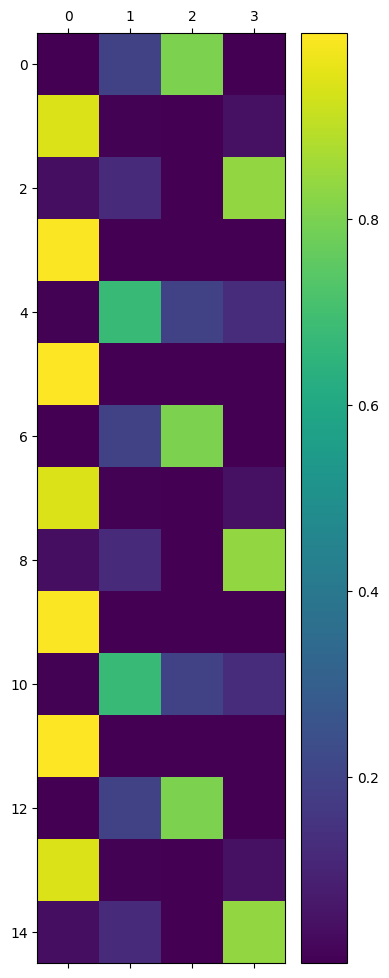

In [114]:
plt.matshow(yhat.data[-15:])
plt.colorbar()

In [119]:
yhat[:15]

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        [9.4671e-01, 7.6233e-03, 6.2076e-04, 4.5044e-02],
        [3.6321e-02, 1.2369e-01, 2.8456e-03, 8.3715e-01],
        [9.9549e-01, 7.4116e-04, 1.1089e-04, 3.6589e-03],
        [7.8381e-03, 6.7206e-01, 1.9159e-01, 1.2850e-01],
        [9.9966e-01, 6.3009e-05, 1.7874e-05, 2.5558e-04],
        [7.4672e-05, 1.9505e-01, 8.0403e-01, 8.4796e-04],
        [9.4783e-01, 7.4739e-03, 6.1198e-04, 4.4082e-02],
        [3.6306e-02, 1.2464e-01, 2.8855e-03, 8.3617e-01],
        [9.9553e-01, 7.3554e-04, 1.1027e-04, 3.6289e-03],
        [7.6975e-03, 6.7204e-01, 1.9431e-01, 1.2595e-01],
        [9.9966e-01, 6.2958e-05, 1.7864e-05, 2.5536e-04],
        [7.4635e-05, 1.9501e-01, 8.0407e-01, 8.4752e-04]],
       grad_fn=<SliceBackward0>)

In [120]:
yhat[:-15]

tensor([[1.6522e-02, 6.2036e-01, 1.0433e-01, 2.5879e-01],
        [9.9965e-01, 6.5788e-05, 1.8450e-05, 2.6785e-04],
        [7.6673e-05, 1.9704e-01, 8.0201e-01, 8.7218e-04],
        ...,
        [9.9553e-01, 7.3543e-04, 1.1026e-04, 3.6284e-03],
        [7.6949e-03, 6.7203e-01, 1.9436e-01, 1.2591e-01],
        [9.9966e-01, 6.2957e-05, 1.7863e-05, 2.5535e-04]],
       grad_fn=<SliceBackward0>)

In [122]:
_test =list(range(4))

In [125]:
_test

[0, 1, 2, 3]

In [124]:
_test[:-3]

[0]

In [126]:
_test[:3]

[0, 1, 2]

- 아주 특이한 특징: yhat[:15], yhat[:-15] 의 적합결과가 다르다
- 왜? 간장계란밥은 간장이 중요한데, 간장은 시간이 갈수록 맛있어지니까..